<a href="https://colab.research.google.com/github/MdEmonMiaOfficial/ML-Th-Lab/blob/main/Ml_Lab_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


In [ ]:
# Load dataset
df = pd.read_csv("/synthetic_employee_data.csv")

In [ ]:
#Linear Regression (Salary Prediction)

In [ ]:


# Check missing values
missing_values = df.isnull().sum()

# Show missing values
print("Missing values in each column:\n")
print(missing_values)


Missing values in each column:

Employee_ID              0
Employee_Name            0
Age                      0
Salary                   0
Years_at_Company         0
Number_of_Projects      24
Performance_Score       19
Is_Manager               0
Works_Remotely          24
Department              30
Education_Level         25
Location                19
Hire_Date               29
Performance_Category     0
dtype: int64


In [ ]:


# Numeric columns: fill missing with mean
numeric_cols = ['Age', 'Salary', 'Years_at_Company', 'Number_of_Projects', 'Performance_Score']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())


# Categorical columns: fill missing with mode
categorical_cols = ['Department', 'Education_Level', 'Location', 'Is_Manager', 'Works_Remotely']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


# Check missing values
print("Missing values after imputation:\n")
print(df.isnull().sum())


Missing values after imputation:

Employee_ID            0
Employee_Name          0
Age                    0
Salary                 0
Years_at_Company       0
Number_of_Projects     0
Performance_Score      0
Is_Manager             0
Works_Remotely         0
Department             0
Education_Level        0
Location               0
Hire_Date             30
dtype: int64


In [ ]:
# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
df['Years_at_Company'] = df['Years_at_Company'].fillna(df['Years_at_Company'].median())

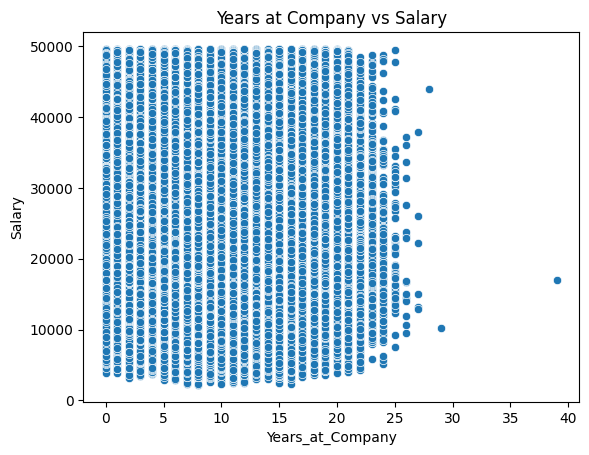

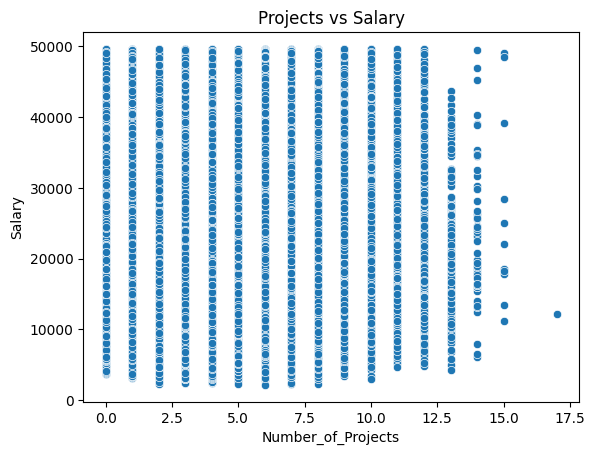

In [ ]:
# Exploratory plots
sns.scatterplot(x='Years_at_Company', y='Salary', data=df)
plt.title("Years at Company vs Salary")
plt.show()

sns.scatterplot(x='Number_of_Projects', y='Salary', data=df)
plt.title("Projects vs Salary")
plt.show()


In [ ]:
# Model
X = df[['Years_at_Company', 'Number_of_Projects', 'Age']]
y = df['Salary']

In [ ]:
# Impute missing values in X after outlier removal
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 7950.052691764129
R² Score: 2.508924640043375e-06


In [ ]:
# Feature influence
coef_df = pd.DataFrame({"Feature": ['Years_at_Company', 'Number_of_Projects', 'Age'], "Coefficient": model.coef_})
print(coef_df)

              Feature  Coefficient
0    Years_at_Company     1.866434
1  Number_of_Projects     6.421942
2                 Age    -1.702044


In [ ]:
# Naïve Bayes Classification (Employee Performance Classification)

In [ ]:
# Evaluate with accuracy, precision, recall, F1-score.

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Categorize performance
def categorize_perf(score):
    if score >= 80:
        return "High"
    elif score < 50:
        return "Low"
    else:
        return "Medium"

df['Performance_Category'] = df['Performance_Score'].apply(categorize_perf)

In [ ]:
# Encode categorical
cat_cols = ['Department','Education_Level','Location']
df[cat_cols] = df[cat_cols].apply(LabelEncoder().fit_transform)

In [ ]:
# Features & target
X = df.drop(columns=['Employee_ID','Employee_Name','Hire_Date','Performance_Score','Performance_Category'])
y = df['Performance_Category']

In [ ]:
# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Impute missing values in X_scaled before training the Naive Bayes model
imputer_nb = SimpleImputer(strategy='median')
X_scaled = imputer_nb.fit_transform(X_scaled)

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Model
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Naïve Bayes Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Extract Naive Bayes metrics
nb_report = classification_report(y_test, y_pred, output_dict=True)
nb_accuracy = nb_report['accuracy']
nb_precision = nb_report['weighted avg']['precision']
nb_recall = nb_report['weighted avg']['recall']
nb_f1 = nb_report['weighted avg']['f1-score']

Naïve Bayes Report:
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00    189525
      Medium       0.00      0.00      0.00         4

    accuracy                           1.00    189529
   macro avg       0.50      0.50      0.50    189529
weighted avg       1.00      1.00      1.00    189529

Confusion Matrix:
 [[189524      1]
 [     4      0]]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import numpy as np

In [ ]:
# Encode target
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(df['Performance_Category'])
y_categorical = to_categorical(y_encoded)

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

In [ ]:
import os
print(os.listdir())

['.config', 'sample_data']


In [ ]:
print(os.listdir('sample_data'))

['anscombe.json', 'README.md', 'mnist_test.csv', 'mnist_train_small.csv', 'california_housing_train.csv', 'california_housing_test.csv']


In [ ]:
import os
print(os.listdir())

['.config', 'sample_data']


In [ ]:
# Model
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Naïve Bayes Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Extract Naive Bayes metrics
nb_report = classification_report(y_test, y_pred, output_dict=True)
nb_accuracy = nb_report['accuracy']
nb_precision = nb_report['weighted avg']['precision']
nb_recall = nb_report['weighted avg']['recall']
nb_f1 = nb_report['weighted avg']['f1-score']

Naïve Bayes Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    200000

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

Confusion Matrix:
 [[200000]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


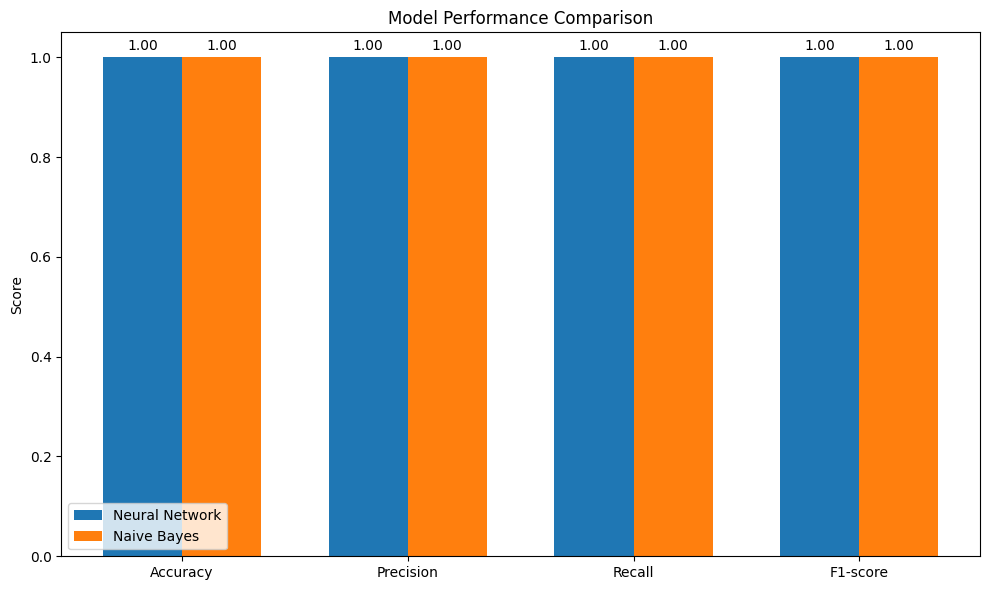

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the metrics stored in variables like:
# nn_accuracy, nn_precision, nn_recall, nn_f1
# nb_accuracy, nb_precision, nb_recall, nb_f1

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
nn_scores = [nn_accuracy, nn_precision, nn_recall, nn_f1]
nb_scores = [nb_accuracy, nb_precision, nb_recall, nb_f1]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, nn_scores, width, label='Neural Network')
rects2 = ax.bar(x + width/2, nb_scores, width, label='Naive Bayes')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [ ]:
# Model
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Naïve Bayes Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Extract Naive Bayes metrics
nb_report = classification_report(y_test, y_pred, output_dict=True)
nb_accuracy = nb_report['accuracy']
nb_precision = nb_report['weighted avg']['precision']
nb_recall = nb_report['weighted avg']['recall']
nb_f1 = nb_report['weighted avg']['f1-score']

Naïve Bayes Report:
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00    189525
      Medium       0.00      0.00      0.00         4

    accuracy                           1.00    189529
   macro avg       0.50      0.50      0.50    189529
weighted avg       1.00      1.00      1.00    189529

Confusion Matrix:
 [[189524      1]
 [     4      0]]


In [ ]:
print(y_train.shape)
print(y_test.shape)

(758112, 2)
(189529, 2)


  Employee_ID Employee_Name    Age      Salary  Years_at_Company  \
0      E00001   Jane Miller  200.0  2000000.00              40.0   
1      E00002    Mike Smith    5.0  1500000.00               2.0   
2      E00003    Alex Smith    5.0  1200000.00               1.0   
3      E00004  Jane Johnson  200.0    17059.81              39.0   
4      E00005  John Johnson    5.0    41383.11               0.0   

   Number_of_Projects  Performance_Score  Is_Manager  Works_Remotely  \
0                 3.0                4.0           0             1.0   
1                 2.0                4.0           0             0.0   
2                 2.0                3.0           1             0.0   
3                 3.0                3.0           0             0.0   
4                 6.0                2.0           0             0.0   

    Department Education_Level Location                   Hire_Date  
0    marketing             PhD  SEATTLE  2021-02-06 15:47:20.059563  
1  Engineering    

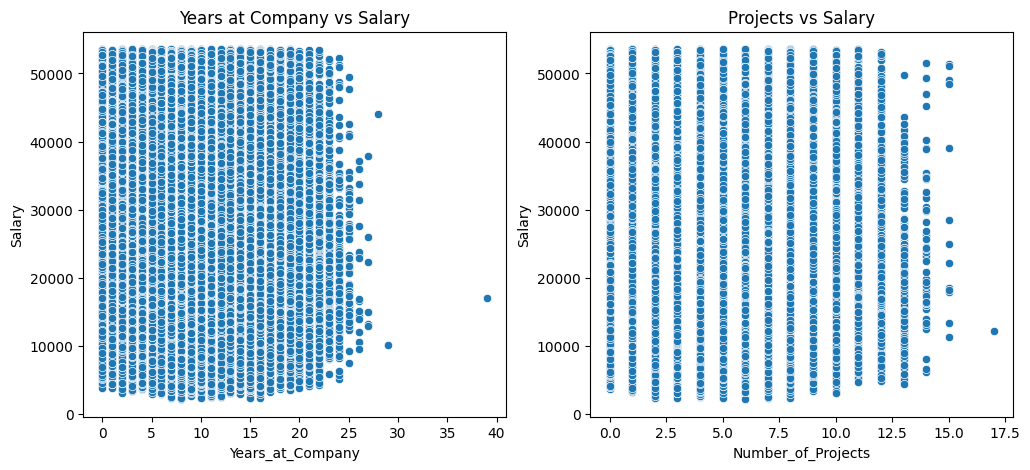

Mean Absolute Error (MAE): 8292.660805606287
R² Score: 3.35004559126606e-06

Feature Influence on Salary:
                    Coefficient
Years_at_Company      -0.263274
Number_of_Projects     4.070677
Age                   -1.759255


In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

# 2. Load Dataset
df = pd.read_csv("/synthetic_employee_data.csv")

# Preview data
print(df.head())

# 3. Data Preparation
# Handle missing values (replace with median)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
df['Years_at_Company'] = df['Years_at_Company'].fillna(df['Years_at_Company'].median())

# Handle outliers (IQR method for Salary)
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Salary'] >= Q1 - 1.5*IQR) & (df['Salary'] <= Q3 + 1.5*IQR)]

# 4. Visualization
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x='Years_at_Company', y='Salary', data=df)
plt.title("Years at Company vs Salary")

plt.subplot(1,2,2)
sns.scatterplot(x='Number_of_Projects', y='Salary', data=df)
plt.title("Projects vs Salary")

plt.show()

# 5. Feature Selection (predict Salary)
X = df[['Years_at_Company', 'Number_of_Projects', 'Age']]
y = df['Salary']

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in X_train after train-test split
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# 7. Model Building
lr = LinearRegression()
lr.fit(X_train, y_train)

# 8. Prediction
y_pred = lr.predict(X_test)

# 9. Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

# 10. Feature Influence (Coefficients)
coefficients = pd.DataFrame(lr.coef_, [['Years_at_Company', 'Number_of_Projects', 'Age']], columns=['Coefficient'])
print("\nFeature Influence on Salary:")
print(coefficients)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [ ]:
# Sample employee dataset
data = pd.DataFrame({
    "Age": np.random.randint(22, 55, 200),
    "Years_at_Company": np.random.randint(1, 15, 200),
    "Number_of_Projects": np.random.randint(1, 10, 200),
    "Department": np.random.choice(["IT", "HR", "Finance", "Marketing"], 200),
    "Gender": np.random.choice(["Male", "Female"], 200),
    "Performance_Score": np.random.randint(40, 100, 200),  # Scores between 40-100
})

print(data.head())


   Age  Years_at_Company  Number_of_Projects Department  Gender  \
0   41                 3                   1         HR  Female   
1   32                 5                   7         HR  Female   
2   53                 3                   3         HR  Female   
3   51                 5                   3  Marketing    Male   
4   32                 3                   7    Finance    Male   

   Performance_Score  
0                 88  
1                 42  
2                 47  
3                 73  
4                 88  


In [ ]:
def categorize(score):
    if score >= 80:
        return "High"
    elif score < 50:
        return "Low"
    else:
        return "Medium"

data["Performance_Category"] = data["Performance_Score"].apply(categorize)


In [ ]:
# Encode categorical variables
le = LabelEncoder()
data["Department"] = le.fit_transform(data["Department"])
data["Gender"] = le.fit_transform(data["Gender"])

# Features & Target
X = data.drop(["Performance_Score", "Performance_Category"], axis=1)
y = data["Performance_Category"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_test)


Model Evaluation:
Accuracy: 0.4250
Precision: 0.3470
Recall: 0.4250
F1-Score: 0.3775


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


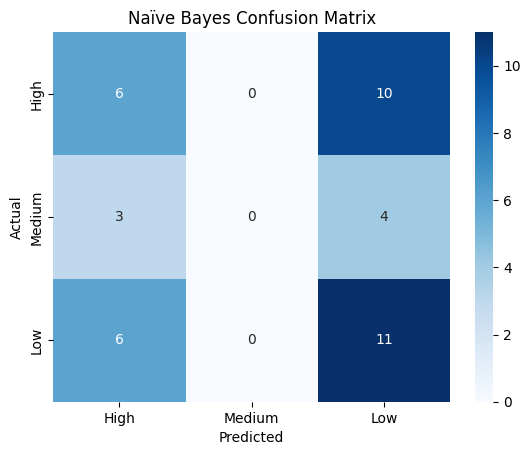


Classification Report:
               precision    recall  f1-score   support

        High       0.40      0.38      0.39        16
         Low       0.00      0.00      0.00         7
      Medium       0.44      0.65      0.52        17

    accuracy                           0.42        40
   macro avg       0.28      0.34      0.30        40
weighted avg       0.35      0.42      0.38        40



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["High","Medium","Low"], yticklabels=["High","Medium","Low"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naïve Bayes Confusion Matrix")
plt.show()

# Detailed Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)